In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math  
import pandas as pd
import os
import pickle


In [1]:
dat_file = "../data/kagome_L12_magnz.dat"   

with open(dat_file, 'r') as file:
    text = file.read()
    print(text)

# 12x12x3 kagome lattice with PBC
# ===============================
# hz | magnz | error
# ===============================
# temp = 0.05 J
0.01000000 -0.03995553 0.00005367
0.14861111 -0.31235241 0.00011184
0.28722222 -0.32583412 0.00065852
0.42583333 -0.26713525 0.00047250
0.56444444 -0.26388889 NaN
0.70305556 -0.26388889 NaN
0.84166667 -0.25000000 0.00000000
0.98027778 -0.26388889 NaN
1.11888889 -0.26851852 NaN
1.25750000 -0.26851852 NaN
1.39611111 -0.26851852 NaN
1.53472222 -0.26414329 0.00022555
1.67333333 -0.30713685 0.00057724
1.81194444 -0.33333333 0.00000000
1.95055556 -0.33333333 0.00000000
2.08916667 -0.33333333 0.00000000
2.22777778 -0.33333333 0.00000000
2.36638889 -0.36662725 0.00171138
2.50500000 -0.39991648 0.00049054
2.64361111 -0.39814815 0.00000000
2.78222222 -0.39814815 0.00000000
2.92083333 -0.39351852 NaN
3.05944444 -0.39814815 0.00000000
3.19805556 -0.38425926 NaN
3.33666667 -0.40740741 NaN
3.47527778 -0.38425926 NaN
3.61388889 -0.39296523 0.00102008
3.75250000 -0

In [37]:
ary = text.split('\n')
temps = []
indices = []
plot_list_x = []
plot_list_y = []
for i in range(len(ary)):
    if ary[i][0:6] == "# temp":
        temps.append(ary[i].split(' ')[3])
        #temps.append(ary[i])
        indices.append(i)
print(indices)
print(temps)

[4, 43, 82, 120, 159, 198, 237, 276, 315, 354, 393, 432, 471, 510, 549, 588, 627]
['0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.40', '0.60', '0.80', '1.00', '1.40', '1.60', '2.00', '3.00', '4.00', '5.00', '6.00']


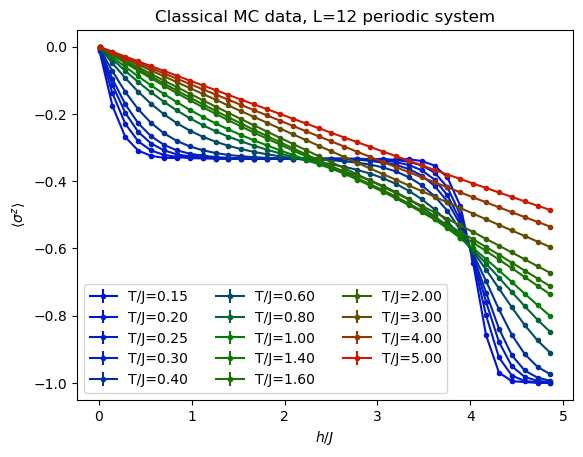

In [47]:
cvals  = [0., 1.0, 6.0]
colors = ["blue","green", "red"]

import matplotlib.colors as mc

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)

for j in range(2,len(temps)-1):

    tarr = ary[(indices[j]+1):(indices[j+1]-2)]
    plot_list_x = []
    plot_list_y = []
    plot_list_y_err = []
    for k in range(len(tarr)):
        plot_list_x.append(float(tarr[k].split(' ')[0]))
        plot_list_y.append(float(tarr[k].split(' ')[1]))
        err = float(tarr[k].split(' ')[2])
        if math.isnan(err):
            plot_list_y_err.append(0.0)
        else:
            plot_list_y_err.append(err)

    plt.errorbar(plot_list_x, plot_list_y, yerr = np.array(plot_list_y_err), label = 'T/J=' + temps[j], fmt = 'o-', color = cmap(float(temps[j])/6.0),markersize = 3)
plt.xlabel(r'$h/J$')
plt.ylabel(r'$\langle \sigma^z \rangle$')
plt.legend(ncol = 3)
plt.title("Classical MC data, L=12 periodic system")
plt.show()
    

[]

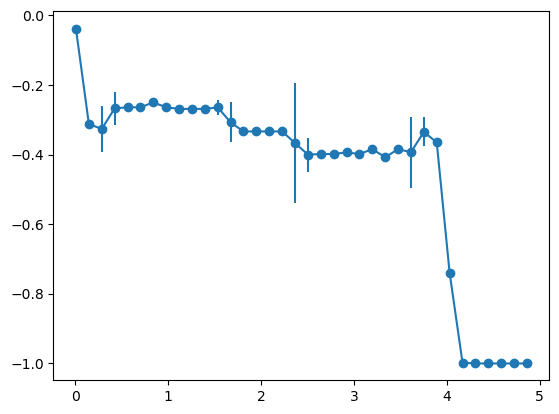

In [36]:
plt.errorbar(plot_list_x, plot_list_y, yerr = 100*np.array(plot_list_y_err), label = 'T/J=' + temps[0], fmt = 'o-')
plt.plot()